The domain for this project is: "Environment and Climate Change".

Here, I have taken Air Quality Index Dataset where data taken is from last 5 years [2015 to 2020] in which various chemical constituents [PM2.5, PM10, NO, NO2, NOx, NH3, CO, SO2, O3, Benzene, Toluene, Xylene] in air are measured at different locations in India daily. Depending on the presence of this constituents in the air for a particular day, the air quality of the day can be categorized into 6 categories: Good, Satisfactory, Moderate, Poor, Very Poor, Severe 

The target variable here is "AQI_Bucket" which has these 6 categories [Good, Satisfactory, Moderate, Poor, Very Poor, Severe ] and is predicted by other feature variables in the dataset.


In [1]:
#importing all the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# reading the data and getting the overall summary of data

In [2]:
#reading and viewing the dataset; header=0 states the column labels are present in initial row

df_aqi=pd.read_csv("https://raw.githubusercontent.com/sarvesh0810/project_aqi/main/city_day.csv",header=0)
df_aqi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory


In [3]:
df_aqi.head(10)          #displaying 1st 10 rows of dataframe

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN
5,Ahmedabad,2015-01-06,NaN,NaN,45.41,38.48,81.50,NaN,45.41,45.76,46.51,5.42,10.83,1.93,NaN,NaN
6,Ahmedabad,2015-01-07,NaN,NaN,112.16,40.62,130.77,NaN,112.16,32.28,33.47,0.00,0.00,0.00,NaN,NaN
7,Ahmedabad,2015-01-08,NaN,NaN,80.87,36.74,96.75,NaN,80.87,38.54,31.89,0.00,0.00,0.00,NaN,NaN
8,Ahmedabad,2015-01-09,NaN,NaN,29.16,31.00,48.00,NaN,29.16,58.68,25.75,0.00,0.00,0.00,NaN,NaN
9,Ahmedabad,2015-01-10,NaN,NaN,NaN,7.04,0.00,NaN,NaN,8.29,4.55,0.00,0.00,0.00,NaN,NaN


In [4]:
df_aqi.tail()         #displays last 5 rows of dataframe

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,2020-06-27,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,2020-06-28,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,2020-06-29,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,2020-06-30,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,2020-07-01,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [5]:
df_aqi.shape        #gives (no. of observations, no. of features)

(29531, 16)

In [6]:
df_aqi.columns      #reading all the columns in the given dataset

Index(['City', 'Date', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2',
       'O3', 'Benzene', 'Toluene', 'Xylene', 'AQI', 'AQI_Bucket'],
      dtype='object')

In [7]:
df_aqi.dtypes       #gives the datatype of the resp. columns

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
Xylene        float64
AQI           float64
AQI_Bucket     object
dtype: object

In [8]:
df_aqi.describe()      #gives the statistical summary of all columns

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
count,24933.000000,18391.000000,25949.000000,25946.000000,25346.000000,19203.000000,27472.000000,25677.000000,25509.000000,23908.000000,21490.000000,11422.000000,24850.000000
mean,67.450578,118.127103,17.574730,28.560659,32.309123,23.483476,2.248598,14.531977,34.491430,3.280840,8.700972,3.070128,166.463581
std,64.661449,90.605110,22.785846,24.474746,31.646011,25.684275,6.962884,18.133775,21.694928,15.811136,19.969164,6.323247,140.696585
min,0.040000,0.010000,0.020000,0.010000,0.000000,0.010000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,13.000000
25%,28.820000,56.255000,5.630000,11.750000,12.820000,8.580000,0.510000,5.670000,18.860000,0.120000,0.600000,0.140000,81.000000
50%,48.570000,95.680000,9.890000,21.690000,23.520000,15.850000,0.890000,9.160000,30.840000,1.070000,2.970000,0.980000,118.000000
75%,80.590000,149.745000,19.950000,37.620000,40.127500,30.020000,1.450000,15.220000,45.570000,3.080000,9.150000,3.350000,208.000000
max,949.990000,1000.000000,390.680000,362.210000,467.630000,352.890000,175.810000,193.860000,257.730000,455.030000,454.850000,170.370000,2049.000000


In [9]:
pd.isnull(df_aqi).sum()        #gives the total no. of missing values in each column of dataframe

City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64

# data cleaning part

# dealing with missing values

In [10]:
#dropping rows with missing values; axis=0: drop rows thresh: no. of non-NA values a row must have
#here thresh=10 meaning a row must have atleast 10 non-NA values

df_aqi.dropna(axis=0,thresh=10,inplace=True) 

In [11]:
df_aqi.shape               #displays shape of new modified dataset

(25812, 16)

In [12]:
pd.isnull(df_aqi).sum()      #again checking for missing values

City              0
Date              0
PM2.5          1046
PM10           7633
NO              241
NO2             279
NOx            1785
NH3            6879
CO              393
SO2             543
O3              740
Benzene        3524
Toluene        5892
Xylene        15816
AQI            1126
AQI_Bucket     1126
dtype: int64

In [13]:
df_aqi.drop("Xylene",axis=1,inplace=True)     #dropping the column 'Xylene' as it has more than 50% missing values

In [14]:
df_aqi.duplicated().sum()      #shows the number of duplicate rows present in the dataset

0

In [15]:
#finding the means and std of all components and storing them in dataframe "mv"

data=[["PM2.5",round(df_aqi["PM2.5"].mean(),2),round(df_aqi["PM2.5"].std(),2)],
      ["PM10",round(df_aqi["PM10"].mean(),2),round(df_aqi["PM10"].std(),2)],
      ["NO",round(df_aqi["NO"].mean(),2),round(df_aqi["NO"].std(),2)],
      ["NO2",round(df_aqi["NO2"].mean(),2),round(df_aqi["NO2"].std(),2)],
      ["NOx",round(df_aqi["NOx"].mean(),2),round(df_aqi["NOx"].std(),2)],
      ["NH3",round(df_aqi["NH3"].mean(),2),round(df_aqi["NH3"].std(),2)],
      ["CO",round(df_aqi["CO"].mean(),2),round(df_aqi["CO"].std(),2)],
      ["SO2",round(df_aqi["SO2"].mean(),2),round(df_aqi["SO2"].std(),2)],
      ["O3",round(df_aqi["O3"].mean(),2),round(df_aqi["O3"].std(),2)],
      ["Benzene",round(df_aqi["Benzene"].mean(),2),round(df_aqi["Benzene"].std(),2)],
      ["Toluene",round(df_aqi["Toluene"].mean(),2),round(df_aqi["Toluene"].std(),2)]]

mv=pd.DataFrame(data,columns=["Element","Mean","Std"])
mv

,Element,Mean,Std
0,PM2.5,67.39,64.45
1,PM10,118.04,90.21
2,NO,17.66,22.80
3,NO2,28.75,24.53
4,NOx,32.20,30.72
5,NH3,23.61,25.74
6,CO,2.39,7.20
7,SO2,14.47,17.94
8,O3,34.64,21.71
9,Benzene,3.51,16.35


In [16]:
#Filling out the missing values in the columns with a random number from (mean-sd , mean+sd)

for i,data in df_aqi.iterrows():
    if pd.isnull(data["PM2.5"]):
        df_aqi.at[i,"PM2.5"]=np.random.uniform(df_aqi["PM2.5"].mean() - df_aqi["PM2.5"].std() , df_aqi["PM2.5"].mean() + df_aqi["PM2.5"].std())

for i,data in df_aqi.iterrows():
    if pd.isnull(data["PM10"]):
        df_aqi.at[i,"PM10"]=np.random.uniform(df_aqi["PM10"].mean() - df_aqi["PM10"].std() , df_aqi["PM10"].mean() + df_aqi["PM10"].std())

for i,data in df_aqi.iterrows():
    if pd.isnull(data["NO"]):
        df_aqi.at[i,"NO"]=np.random.uniform(df_aqi["NO"].mean() - df_aqi["NO"].std() , df_aqi["NO"].mean() + df_aqi["NO"].std())

for i,data in df_aqi.iterrows():
    if pd.isnull(data["NO2"]):
        df_aqi.at[i,"NO2"]=np.random.uniform(df_aqi["NO2"].mean() - df_aqi["NO2"].std() , df_aqi["NO2"].mean() + df_aqi["NO2"].std())

for i,data in df_aqi.iterrows():
    if pd.isnull(data["NOx"]):
        df_aqi.at[i,"NOx"]=np.random.uniform(df_aqi["NOx"].mean() - df_aqi["NOx"].std() , df_aqi["NOx"].mean() + df_aqi["NOx"].std())

for i,data in df_aqi.iterrows():
    if pd.isnull(data["NH3"]):
        df_aqi.at[i,"NH3"]=np.random.uniform(df_aqi["NH3"].mean() - df_aqi["NH3"].std() , df_aqi["NH3"].mean() + df_aqi["NH3"].std())
        
for i,data in df_aqi.iterrows():
    if pd.isnull(data["CO"]):
        df_aqi.at[i,"CO"]=np.random.uniform(df_aqi["CO"].mean() - df_aqi["CO"].std() , df_aqi["CO"].mean() + df_aqi["CO"].std())
        
for i,data in df_aqi.iterrows():
    if pd.isnull(data["SO2"]):
        df_aqi.at[i,"SO2"]=np.random.uniform(df_aqi["SO2"].mean() - df_aqi["SO2"].std() , df_aqi["SO2"].mean() + df_aqi["SO2"].std())
        
for i,data in df_aqi.iterrows():
    if pd.isnull(data["O3"]):
        df_aqi.at[i,"O3"]=np.random.uniform(df_aqi["O3"].mean() - df_aqi["O3"].std() , df_aqi["O3"].mean() + df_aqi["O3"].std())
        
for i,data in df_aqi.iterrows():
    if pd.isnull(data["Benzene"]):
        df_aqi.at[i,"Benzene"]=np.random.uniform(df_aqi["Benzene"].mean() - df_aqi["Benzene"].std() , df_aqi["Benzene"].mean() + df_aqi["Benzene"].std())
        
for i,data in df_aqi.iterrows():
    if pd.isnull(data["Toluene"]):
        df_aqi.at[i,"Toluene"]=np.random.uniform(df_aqi["Toluene"].mean() - df_aqi["Toluene"].std() , df_aqi["Toluene"].mean() + df_aqi["Toluene"].std())

In [17]:
pd.isnull(df_aqi).sum()         #checking again for the missing values

City             0
Date             0
PM2.5            0
PM10             0
NO               0
NO2              0
NOx              0
NH3              0
CO               0
SO2              0
O3               0
Benzene          0
Toluene          0
AQI           1126
AQI_Bucket    1126
dtype: int64

In [18]:
#dropping all those rows which have missing values for our target variable "AQI"

df_aqi.dropna(axis=0,inplace=True)

In [19]:
#dealed all missing values and got a complete dataset wwith no missing values

pd.isnull(df_aqi).sum()

City          0
Date          0
PM2.5         0
PM10          0
NO            0
NO2           0
NOx           0
NH3           0
CO            0
SO2           0
O3            0
Benzene       0
Toluene       0
AQI           0
AQI_Bucket    0
dtype: int64

# dealing with outliers

C:\Users\Sarvesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarvesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarvesh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Sarvesh\anaconda

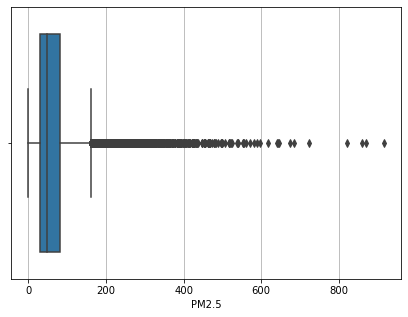

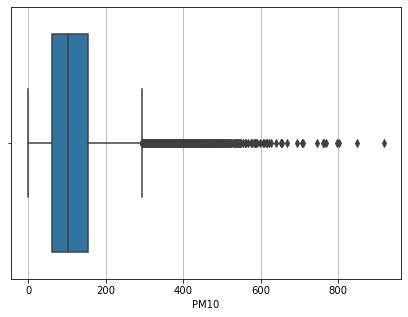

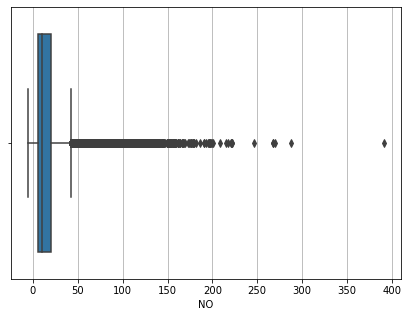

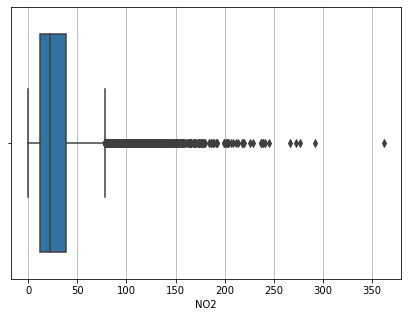

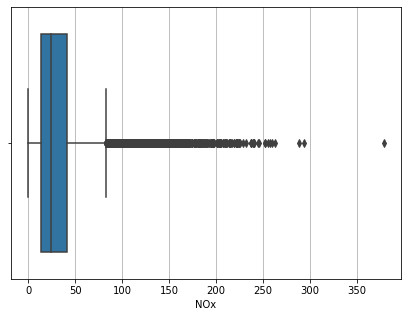

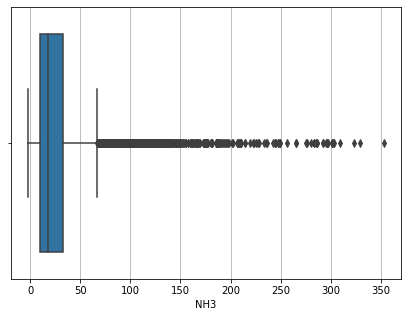

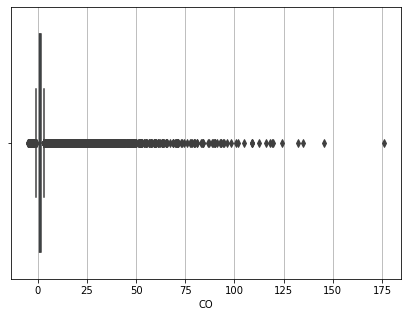

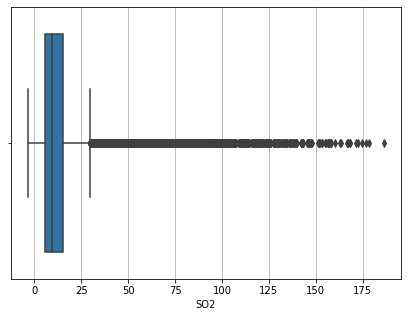

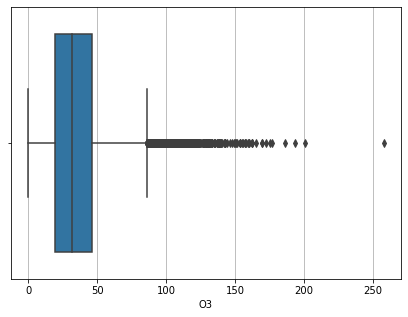

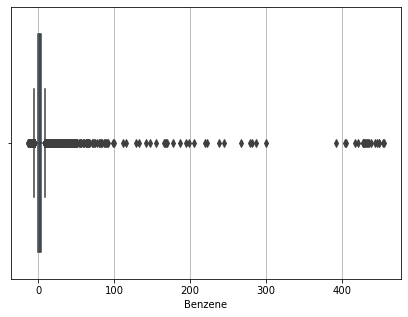

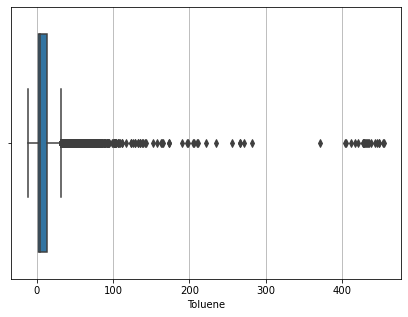

In [20]:
def box(x):                            #defining a function to plot a boxplot for columns for finding outliers
    plt.figure(figsize=(7,5))
    plt.grid()
    sns.boxplot(x)
    
box(df_aqi["PM2.5"])                   #plotting boxplots for all columns one by one using function "box"
box(df_aqi["PM10"])
box(df_aqi["NO"])
box(df_aqi["NO2"])
box(df_aqi["NOx"])
box(df_aqi["NH3"])
box(df_aqi["CO"])
box(df_aqi["SO2"])
box(df_aqi["O3"])
box(df_aqi["Benzene"])
box(df_aqi["Toluene"])

In [21]:
def qtl(x):                               #function for finding (0.05)th quantile and (0.95)th quantile
    lq=round(x.quantile(0.05),2)
    uq=round(x.quantile(0.95),2)
    print(lq,uq)
    
qtl(df_aqi["PM2.5"])                      #printing all quantile values one by one
qtl(df_aqi["PM10"])
qtl(df_aqi["NO"])
qtl(df_aqi["NO2"])
qtl(df_aqi["NOx"])
qtl(df_aqi["NH3"])
qtl(df_aqi["CO"])
qtl(df_aqi["SO2"])
qtl(df_aqi["O3"])
qtl(df_aqi["Benzene"])
qtl(df_aqi["Toluene"])

13.29 192.36
30.32 269.71
1.74 61.54
5.15 74.52
3.8 92.3
2.64 56.06
0.09 8.25
2.66 45.04
7.48 74.13
-0.99 14.69
-1.42 32.37


In [22]:
#replacing the values lying outside (0.05,0.95)quantiles with 0.05th and 0.95th quantile

for i,data in df_aqi.iterrows():
    if data["PM2.5"]<df_aqi["PM2.5"].quantile(0.05):
        df_aqi.at[i,"PM2.5"]=df_aqi["PM2.5"].quantile(0.05)
    if data["PM2.5"]>df_aqi["PM2.5"].quantile(0.95):
        df_aqi.at[i,"PM2.5"]=df_aqi["PM2.5"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["PM10"]<df_aqi["PM10"].quantile(0.05):
        df_aqi.at[i,"PM10"]=df_aqi["PM10"].quantile(0.05)
    if data["PM10"]>df_aqi["PM10"].quantile(0.95):
        df_aqi.at[i,"PM10"]=df_aqi["PM10"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["NO"]<df_aqi["NO"].quantile(0.05):
        df_aqi.at[i,"NO"]=df_aqi["NO"].quantile(0.05)
    if data["NO"]>df_aqi["NO"].quantile(0.95):
        df_aqi.at[i,"NO"]=df_aqi["NO"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["NO2"]<df_aqi["NO2"].quantile(0.05):
        df_aqi.at[i,"NO2"]=df_aqi["NO2"].quantile(0.05)
    if data["NO2"]>df_aqi["NO2"].quantile(0.95):
        df_aqi.at[i,"NO2"]=df_aqi["NO2"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["NOx"]<df_aqi["NOx"].quantile(0.05):
        df_aqi.at[i,"NOx"]=df_aqi["NOx"].quantile(0.05)
    if data["NOx"]>df_aqi["NOx"].quantile(0.95):
        df_aqi.at[i,"NOx"]=df_aqi["NOx"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["NH3"]<df_aqi["NH3"].quantile(0.05):
        df_aqi.at[i,"NH3"]=df_aqi["NH3"].quantile(0.05)
    if data["NH3"]>df_aqi["NH3"].quantile(0.95):
        df_aqi.at[i,"NH3"]=df_aqi["NH3"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["CO"]<df_aqi["CO"].quantile(0.05):
        df_aqi.at[i,"CO"]=df_aqi["CO"].quantile(0.05)
    if data["CO"]>df_aqi["CO"].quantile(0.95):
        df_aqi.at[i,"CO"]=df_aqi["CO"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["SO2"]<df_aqi["SO2"].quantile(0.05):
        df_aqi.at[i,"SO2"]=df_aqi["SO2"].quantile(0.05)
    if data["SO2"]>df_aqi["SO2"].quantile(0.95):
        df_aqi.at[i,"SO2"]=df_aqi["SO2"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["O3"]<df_aqi["O3"].quantile(0.05):
        df_aqi.at[i,"O3"]=df_aqi["O3"].quantile(0.05)
    if data["O3"]>df_aqi["O3"].quantile(0.95):
        df_aqi.at[i,"O3"]=df_aqi["O3"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["Benzene"]<df_aqi["Benzene"].quantile(0.05):
        df_aqi.at[i,"Benzene"]=df_aqi["Benzene"].quantile(0.05)
    if data["Benzene"]>df_aqi["Benzene"].quantile(0.95):
        df_aqi.at[i,"Benzene"]=df_aqi["Benzene"].quantile(0.95)
        
for i,data in df_aqi.iterrows():
    if data["Toluene"]<df_aqi["Toluene"].quantile(0.05):
        df_aqi.at[i,"Toluene"]=df_aqi["Toluene"].quantile(0.05)
    if data["Toluene"]>df_aqi["Toluene"].quantile(0.95):
        df_aqi.at[i,"Toluene"]=df_aqi["Toluene"].quantile(0.95)
        


In [23]:
df_aqi.sort_values(["Date","City"],ascending=True,inplace=True)      #sorting the values in ascending order by Date and City(alphabetical)

# feature engineering: extracting more information from existing data for analysis

In [24]:
for i,data in df_aqi.iterrows():     #i: specifies index position; data specifies data in df at corresponding index
    x=data['Date'].split("-")        #spliting date by '-' to get year and month
    df_aqi.at[i,"Year"]=x[2]         #assigning year to column 'year'
    df_aqi.at[i,"Month"]=x[1]        #assigning month to column 'month'

In [25]:
df_aqi.reset_index(drop=True,inplace=True)        #reseting index and dropping original index

In [26]:
df_aqi.dtypes

City           object
Date           object
PM2.5         float64
PM10          float64
NO            float64
NO2           float64
NOx           float64
NH3           float64
CO            float64
SO2           float64
O3            float64
Benzene       float64
Toluene       float64
AQI           float64
AQI_Bucket     object
Year           object
Month          object
dtype: object

In [27]:
summer=["03","04","05"]                        #creating seperate lists for different seasons based on months
monsoon=["06","07","08","09"]
autumn=["10","11"]
winter=["12","01","02"]

for i,data in df_aqi.iterrows():               #creating a new column 'Season'
    if data['Month'] in summer:
        df_aqi.at[i,"Season"]="Summer"
    if data['Month'] in monsoon:
        df_aqi.at[i,"Season"]="Monsoon"
    if data['Month'] in autumn:
        df_aqi.at[i,"Season"]="Autumn"
    if data['Month'] in winter:
        df_aqi.at[i,"Season"]="Winter"

In [28]:
df_aqi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,Season
0,Delhi,2015-01-01,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,472.0,Severe,01,01,Winter
1,Delhi,2015-01-02,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,454.0,Severe,02,01,Winter
2,Delhi,2015-01-03,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,143.0,Moderate,03,01,Winter
3,Delhi,2015-01-04,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,319.0,Very Poor,04,01,Winter
4,Delhi,2015-01-05,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,325.0,Very Poor,05,01,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,Patna,2020-07-01,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,98.0,Satisfactory,01,07,Monsoon
24682,Shillong,2020-07-01,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,24.0,Good,01,07,Monsoon
24683,Talcher,2020-07-01,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,101.0,Moderate,01,07,Monsoon
24684,Thiruvananthapuram,2020-07-01,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,41.0,Good,01,07,Monsoon


In [29]:
df_aqi["City"].unique()    #displays the cities where AQI is measured

array(['Delhi', 'Ahmedabad', 'Bengaluru', 'Lucknow', 'Chennai',
       'Hyderabad', 'Patna', 'Gurugram', 'Visakhapatnam', 'Amritsar',
       'Jorapokhar', 'Jaipur', 'Thiruvananthapuram', 'Amaravati',
       'Brajrajnagar', 'Talcher', 'Kolkata', 'Mumbai', 'Guwahati',
       'Coimbatore', 'Shillong', 'Chandigarh', 'Bhopal', 'Kochi',
       'Ernakulam', 'Aizawl'], dtype=object)

In [30]:
#creating list of cities based on their geographical region

north_India=['Delhi', 'Lucknow','Amritsar']
west_coast=['Mumbai','Kochi','Thiruvananthapuram']
east_coast=['Chennai','Visakhapatnam','Kolkata']
central_India=['Bhopal','Ahmedabad','Jorapokhar']
north_east=['Guwahati','Shillong','Aizawl']
deccan_plateau=['Bengaluru','Hyderabad','Coimbatore']

In [31]:
#creating a new column 'Geo. Region' to store Geographical region of cities based on their location

for i,data in df_aqi.iterrows():
    if data["City"] in north_India:
        df_aqi.at[i,"Geo. Region"]="North India"
    if data["City"] in west_coast:
        df_aqi.at[i,"Geo. Region"]="West Coast"
    if data["City"] in east_coast:
        df_aqi.at[i,"Geo. Region"]="East Coast"
    if data["City"] in central_India:
        df_aqi.at[i,"Geo. Region"]="Central India"
    if data["City"] in north_east:
        df_aqi.at[i,"Geo. Region"]="North East"
    if data["City"] in deccan_plateau:
        df_aqi.at [i,"Geo. Region"]="Deccan Plateau"

In [32]:
df_aqi

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Month,Season,Geo. Region
0,Delhi,2015-01-01,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,472.0,Severe,01,01,Winter,North India
1,Delhi,2015-01-02,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,454.0,Severe,02,01,Winter,North India
2,Delhi,2015-01-03,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,143.0,Moderate,03,01,Winter,North India
3,Delhi,2015-01-04,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,319.0,Very Poor,04,01,Winter,North India
4,Delhi,2015-01-05,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,325.0,Very Poor,05,01,Winter,North India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,Patna,2020-07-01,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,98.0,Satisfactory,01,07,Monsoon,NaN
24682,Shillong,2020-07-01,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,24.0,Good,01,07,Monsoon,North East
24683,Talcher,2020-07-01,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,101.0,Moderate,01,07,Monsoon,NaN
24684,Thiruvananthapuram,2020-07-01,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,41.0,Good,01,07,Monsoon,West Coast


In [33]:
df_aqi.drop(["Date","Month"],axis=1,inplace=True)     #dropping columns that are not required

In [34]:
#converting datatype of the columns having categorical data to 'category' datatype

df_aqi["AQI_Bucket"]=df_aqi["AQI_Bucket"].astype('category')
df_aqi["Year"]=df_aqi["Year"].astype('category')
df_aqi["Season"]=df_aqi["Season"].astype("category")
df_aqi["Geo. Region"]=df_aqi["Geo. Region"].astype("category")

In [35]:
df_aqi.dtypes

City             object
PM2.5           float64
PM10            float64
NO              float64
NO2             float64
NOx             float64
NH3             float64
CO              float64
SO2             float64
O3              float64
Benzene         float64
Toluene         float64
AQI             float64
AQI_Bucket     category
Year           category
Season         category
Geo. Region    category
dtype: object

In [36]:
df_aqi["AQI_Bucket"]

0              Severe
1              Severe
2            Moderate
3           Very Poor
4           Very Poor
             ...     
24681    Satisfactory
24682            Good
24683        Moderate
24684            Good
24685            Good
Name: AQI_Bucket, Length: 24686, dtype: category
Categories (6, object): ['Good', 'Moderate', 'Poor', 'Satisfactory', 'Severe', 'Very Poor']

Some modification for storing categories-"AQI_Bucket" based on their magnitiudes

In [37]:
#Here we 1st import CategoricalDtype from pandas.api.types and then store in type 'cat_bucket' in the order we want 
#And then in next step we change its type using function 'astype'

from pandas.api.types import CategoricalDtype
cat_bucket=CategoricalDtype(["Good","Satisfactory","Moderate","Poor","Very Poor","Severe"],ordered=True)
df_aqi["AQI_Bucket"]=df_aqi["AQI_Bucket"].astype(cat_bucket)
df_aqi["AQI_Bucket"]

0              Severe
1              Severe
2            Moderate
3           Very Poor
4           Very Poor
             ...     
24681    Satisfactory
24682            Good
24683        Moderate
24684            Good
24685            Good
Name: AQI_Bucket, Length: 24686, dtype: category
Categories (6, object): ['Good' < 'Satisfactory' < 'Moderate' < 'Poor' < 'Very Poor' < 'Severe']

# data analysis

In [38]:
#displays total no. of days by "AQI Bucket" measured in Indian cities in last 5 years 

df_aqi["AQI_Bucket"].value_counts()

Moderate        8769
Satisfactory    8168
Poor            2767
Very Poor       2332
Severe          1337
Good            1313
Name: AQI_Bucket, dtype: int64

<AxesSubplot:>

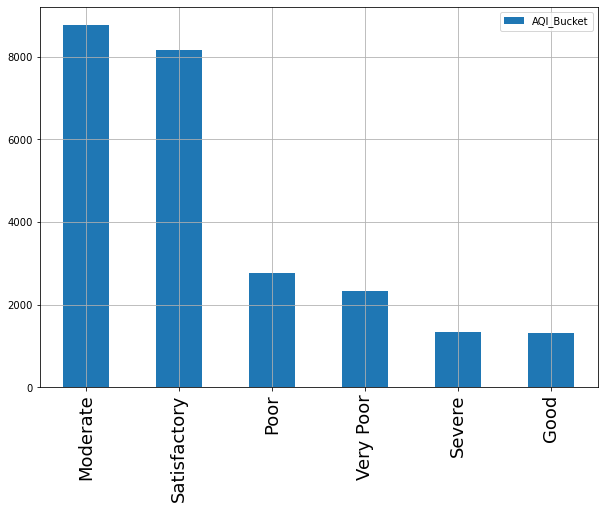

In [39]:
#Bar plot for the above data
#X-axis has the catergories-"AQI Bucket" in decreasing order of their count
#Y-axis has the count for the respective catergories in last 5 years

plt.figure(figsize=(10,7))                                                    #figuresize
plt.xticks(fontsize=18)                                                       #increasing the fontsize of labels on x-axis
df_aqi["AQI_Bucket"].value_counts().plot(kind="bar",legend=True,grid=True)    #plotting bar graph for the counts of categories 

In [40]:
#breakup of the above data
#shows yearwise breakup of the "AQI Bucket" and displays the count of respective categories in each year for all cities
#data is group yearly 1st and further by category of air in each year; .size() gives the size of data in respective group

df_aqi[["Year","AQI_Bucket"]].groupby(["Year","AQI_Bucket"]).size()   

Year  AQI_Bucket  
01    Good             50
      Satisfactory    264
      Moderate        305
      Poor             81
      Very Poor        82
                     ... 
31    Satisfactory    151
      Moderate        171
      Poor             51
      Very Poor        45
      Severe           34
Length: 186, dtype: int64

<AxesSubplot:xlabel='AQI_Bucket,Year'>

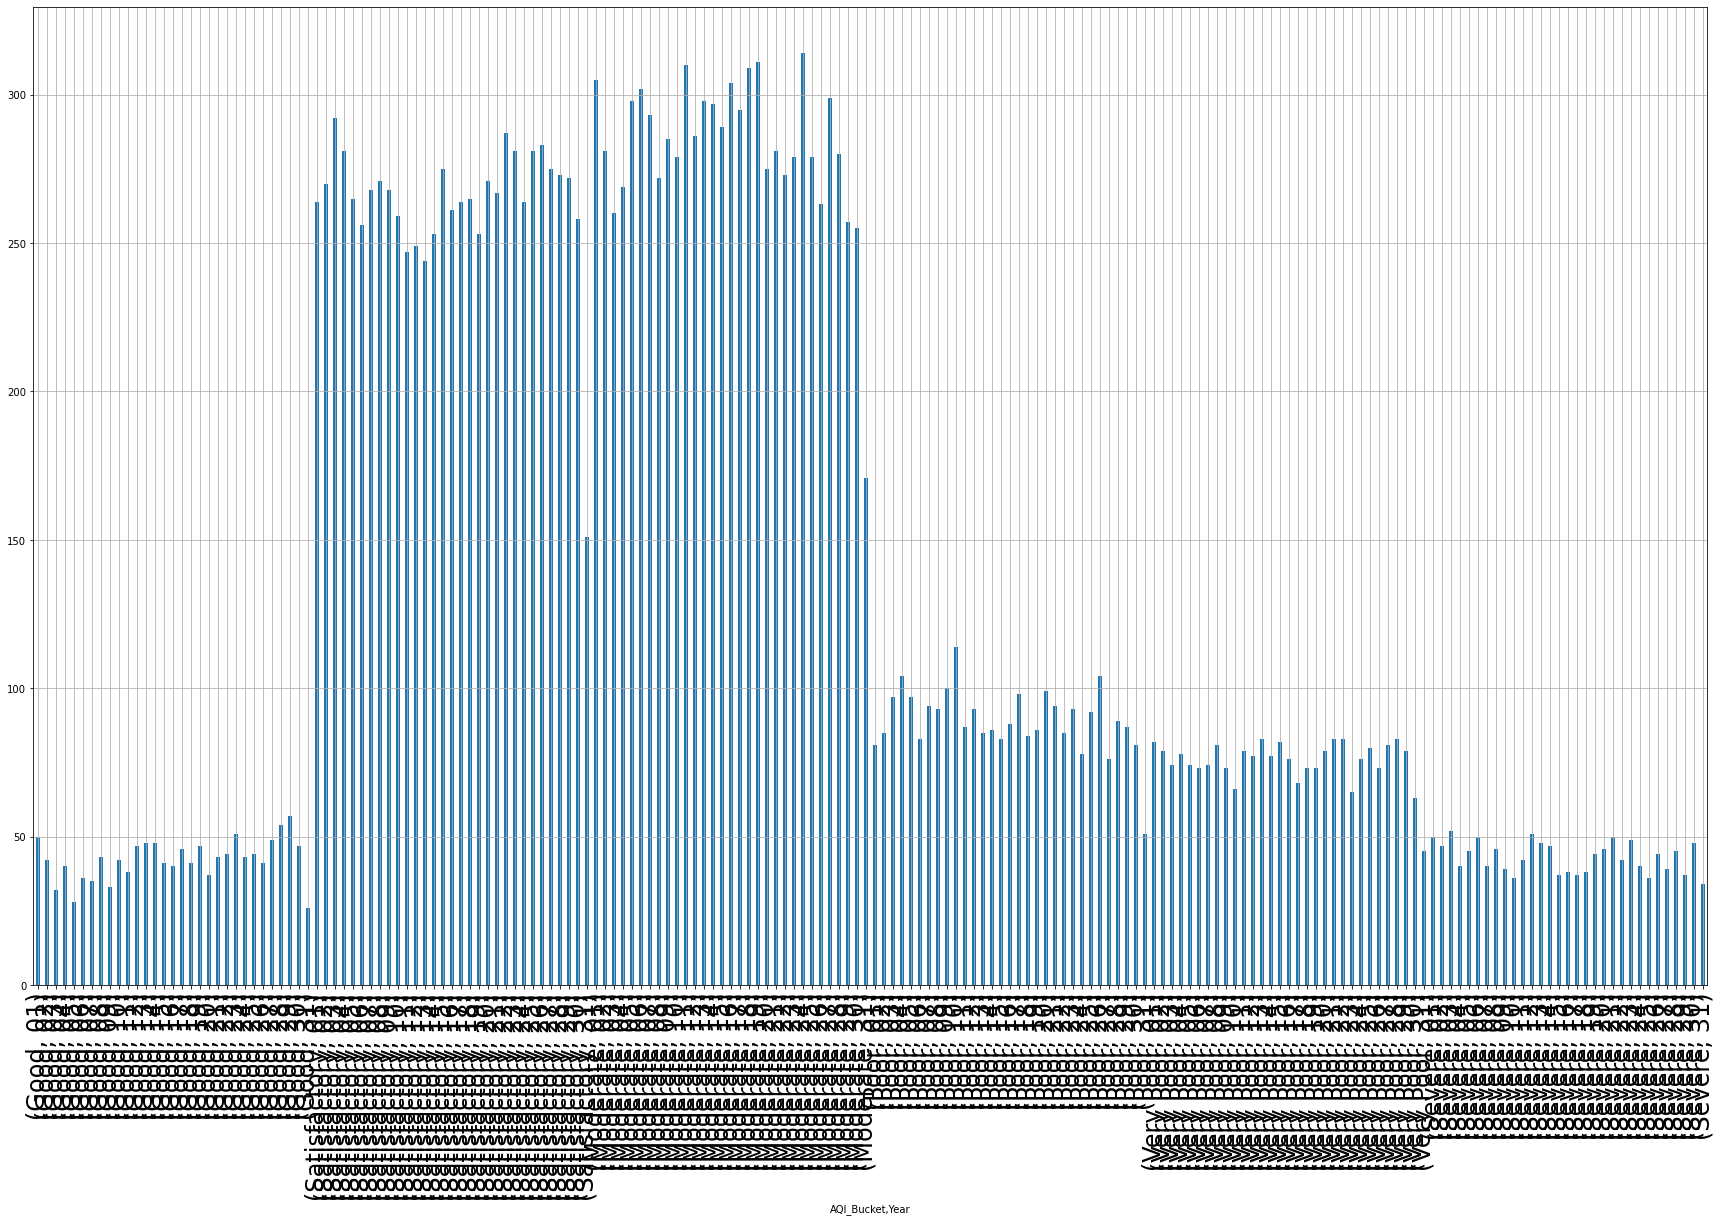

In [41]:
#plot for above data showing no. of days for each category in last 5 years

plt.xticks(fontsize=24)
df_aqi[["Year","AQI_Bucket"]].groupby(["AQI_Bucket","Year"]).size().plot(kind="bar",figsize=(30,18),grid=True)

Conclusion from the above graph:

1)Thus the above graph shows no. of "Good air quality days" are increasing from 2015 to 2020 which shows there
are some measures taken by the government or other bodies to reduce air pollution.

2)Also among all the categories "Satisfactory" and "Moderate" are in huge numbers indicating the overall air quality in 
all cities is average and there is room for improvement.

3)Also there is a drastic drop of "Severe air quality days" in year 2020 from 2019 which indicates the lockdown due to
"COVID-19" pandemic had some impact on the air quality.


In [42]:
#shows the breakup of the "AQI Bucket" on the basis of different regions in India
#data is first groupby different regions and then overall count of each air category is displayed in each region

df_aqi[["Geo. Region","AQI_Bucket"]].groupby(["Geo. Region","AQI_Bucket"]).size()

Geo. Region     AQI_Bucket  
Central India   Good              10
                Satisfactory     247
                Moderate         804
                Poor             389
                Very Poor        254
                Severe           655
Deccan Plateau  Good             298
                Satisfactory    2119
                Moderate        1601
                Poor              90
                Very Poor         15
                Severe             7
East Coast      Good             182
                Satisfactory    1668
                Moderate        1532
                Poor             303
                Very Poor         95
                Severe            19
North East      Good             310
                Satisfactory     247
                Moderate         121
                Poor              69
                Very Poor         59
                Severe             5
North India     Good             117
                Satisfactory     993
         

<AxesSubplot:xlabel='Geo. Region,AQI_Bucket'>

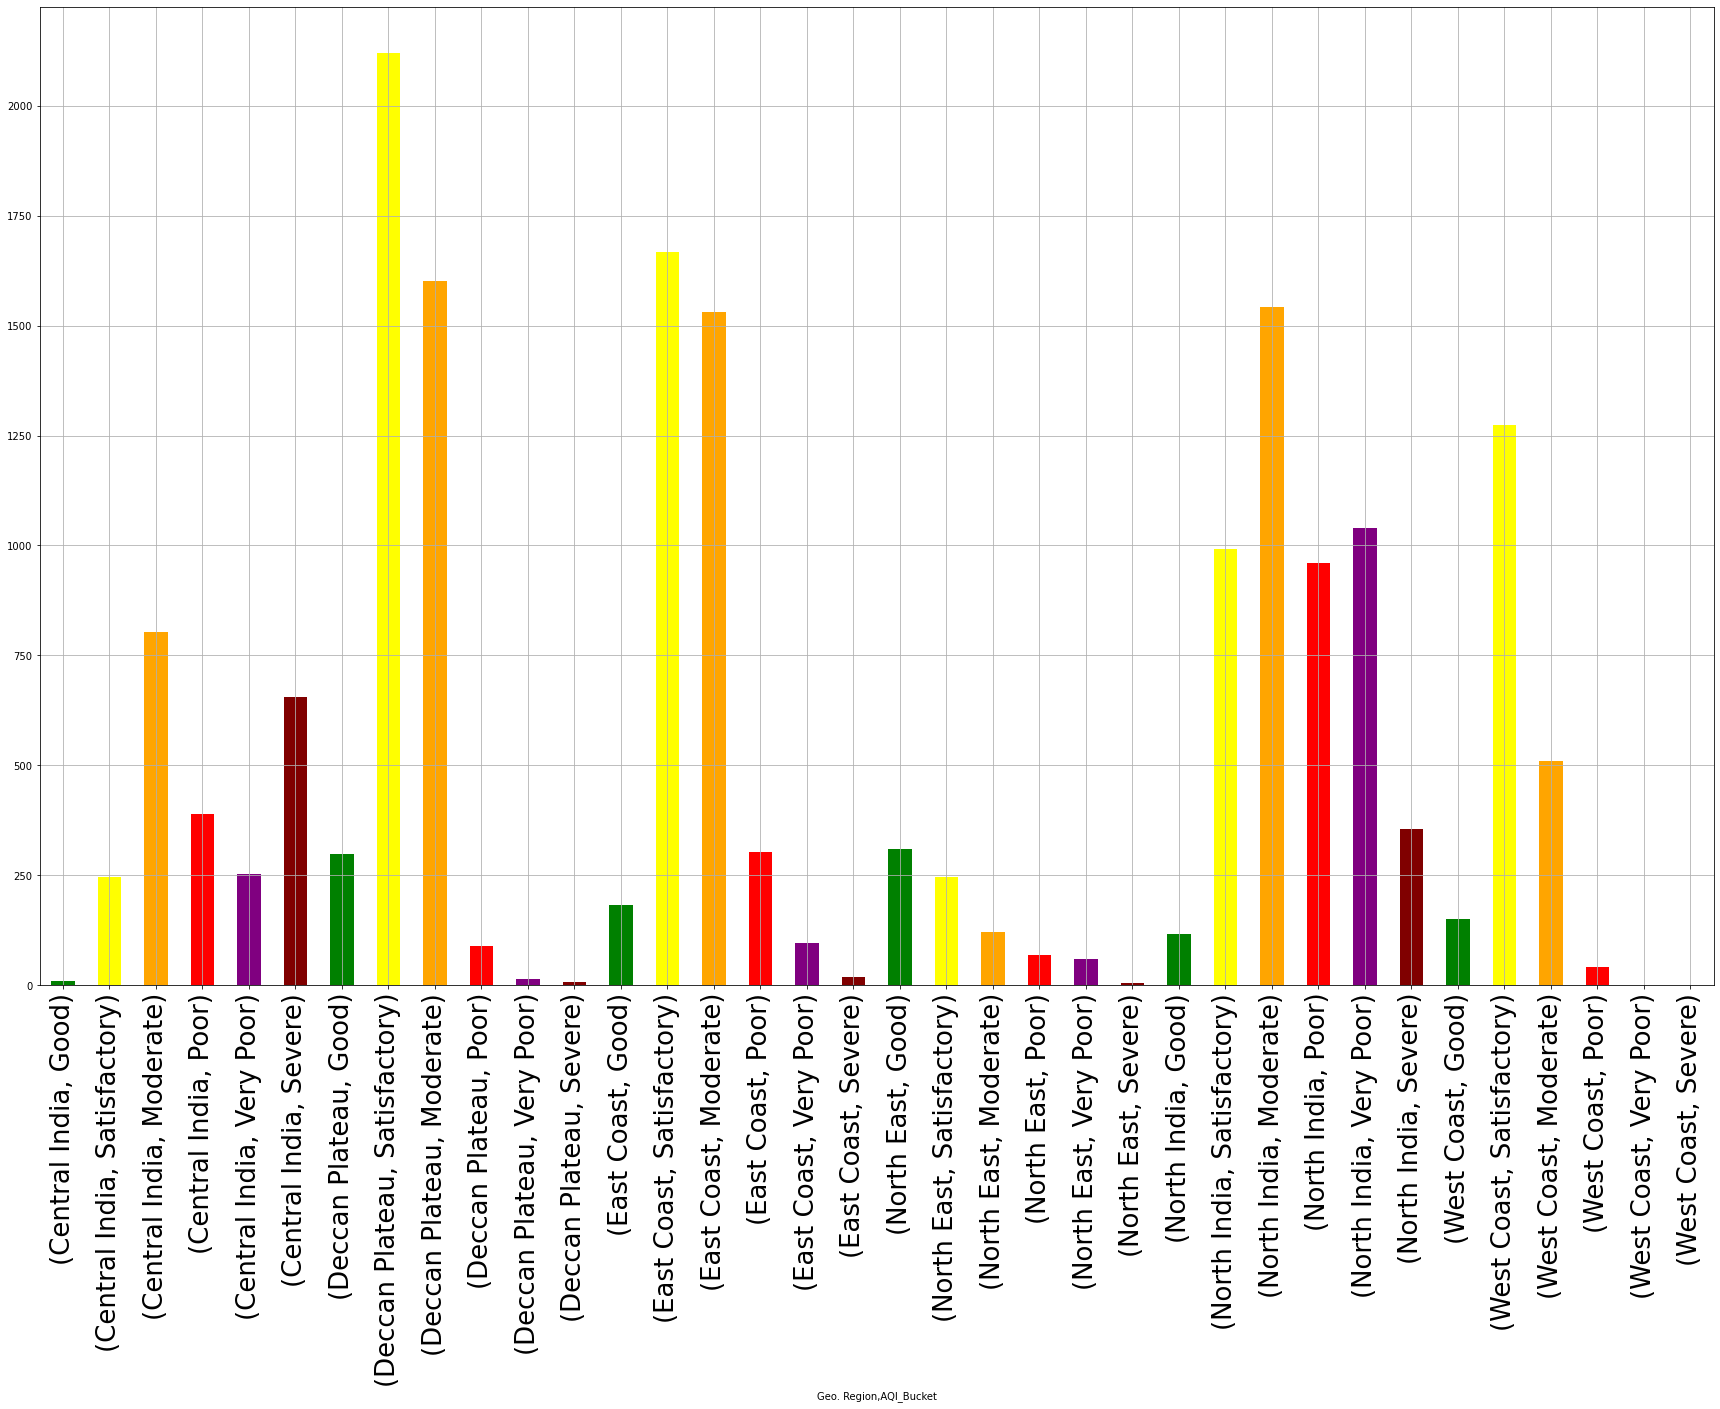

In [43]:
#plot for the above data
#barplot showing no. of days in each category in all regions with colors for each category
#colors chosen are standard AQI colors described by the Government 
#[Good:Green, Satisfactory:Yellow, Moderate:Orange, Poor:Red, Very Poor:Purple, Severe:Maroon]

plt.xticks(fontsize=26)
df_aqi[["Geo. Region","AQI_Bucket"]].groupby(["Geo. Region","AQI_Bucket"]).size().plot(kind="bar",figsize=(30,18),
                            grid=True,color=["green","yellow","orange","red","purple","maroon"])

Conclusion:

1)Thus from above plot we can see, both the coastal regions of India- West and East Coast have relatively less no. of days having poor to severe air quality. Also, the region in betweenn this two coasts-"Deccan Plateau" also has similar air quality.

2)Whereas the regions- Central India and North India have more days in Poor to Severe air quality.

3)The North East region has more no. of days in category Good to Moderate. This maybe due to the fact that the region is mostly rural and has fewer industries

So we can conclude that the Geographical Region of a paraticular area or city has some affect on its air quality.

In [44]:
#Breakdown of the AQI_Bucket based on different seasons in India
#data grouped by season first and then the count is displayed for each air category in respective seasons

df_aqi[["AQI_Bucket","Season"]].groupby(["Season","AQI_Bucket"]).size()

Season   AQI_Bucket  
Autumn   Good              71
         Satisfactory     920
         Moderate        1262
         Poor             541
         Very Poor        624
         Severe           374
Monsoon  Good             849
         Satisfactory    3738
         Moderate        2227
         Poor             428
         Very Poor        149
         Severe           237
Summer   Good             360
         Satisfactory    2401
         Moderate        2873
         Poor             836
         Very Poor        379
         Severe           187
Winter   Good              33
         Satisfactory    1109
         Moderate        2407
         Poor             962
         Very Poor       1180
         Severe           539
dtype: int64

<AxesSubplot:xlabel='Season,AQI_Bucket'>

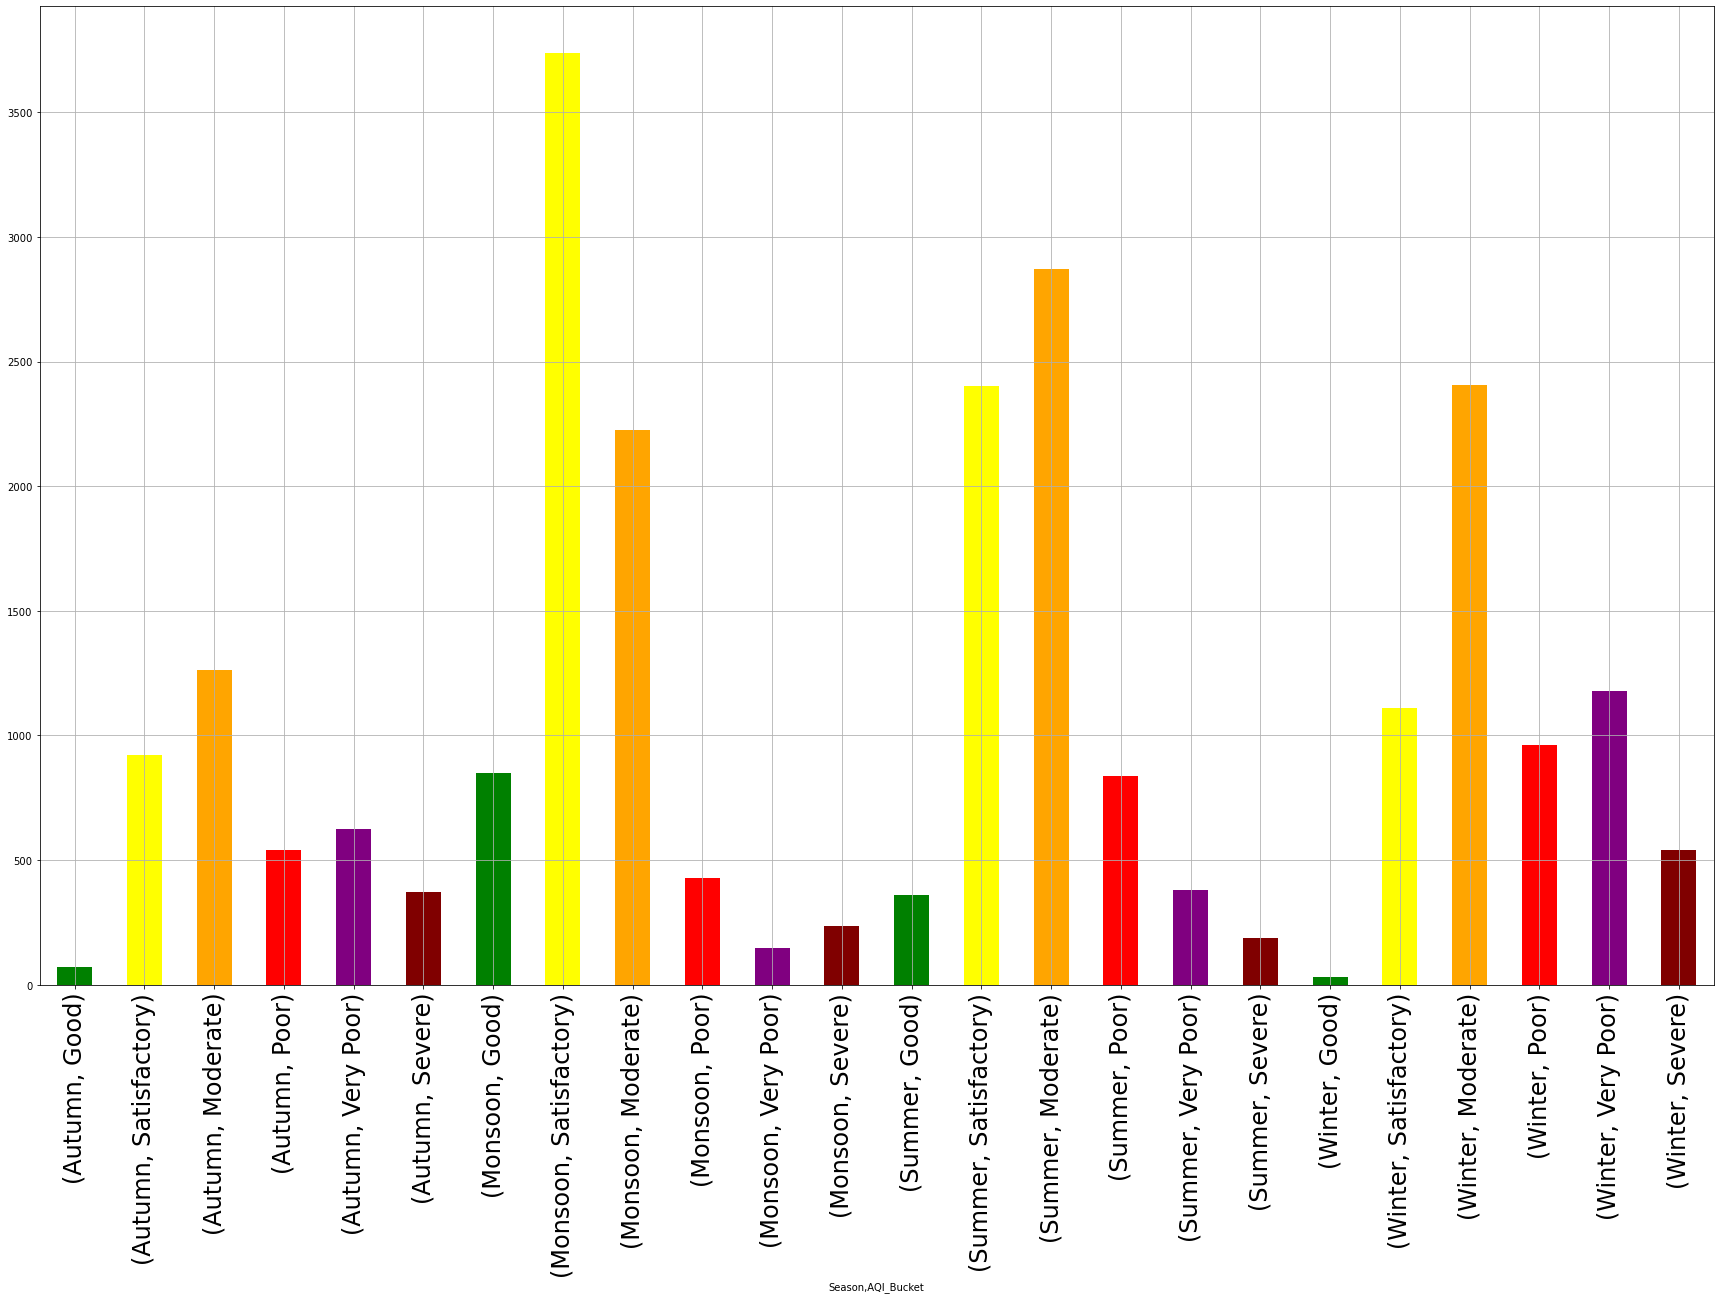

In [45]:
#plot for the above data
#plot shows no. of days in each air quality differentiated by different seasons

plt.xticks(fontsize=24)
df_aqi[["AQI_Bucket","Season"]].groupby(["Season","AQI_Bucket"]).size().plot(kind='bar',
                                        grid=True,figsize=(30,18),color=["green","yellow","orange","red","purple","maroon"])

Conclusion:

1)The plot shows that there are large no. of good to moderate days in season 'monsoon' followed by 'summer' season.
2)Whereas seasons-"Autumn" and "winter" both of which are post monsoon season have less no. of good air quality days and have large no. of Poor to severe air quality.
3)This maybe due to the fact that monsoon in India comes up with strong winds which pushes the bad air and the areas experience a good to moderate quality of air; whereas the climate in Winter and Autumn is mostly dry.

Thus, we can say that seasonal weathers of India have a certain impact on the air quality.

In [46]:
df_aqi

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Season,Geo. Region
0,Delhi,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,472.0,Severe,01,Winter,North India
1,Delhi,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,454.0,Severe,02,Winter,North India
2,Delhi,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,143.0,Moderate,03,Winter,North India
3,Delhi,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,319.0,Very Poor,04,Winter,North India
4,Delhi,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,325.0,Very Poor,05,Winter,North India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,Patna,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,98.0,Satisfactory,01,Monsoon,NaN
24682,Shillong,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,24.0,Good,01,Monsoon,North East
24683,Talcher,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,101.0,Moderate,01,Monsoon,NaN
24684,Thiruvananthapuram,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,41.0,Good,01,Monsoon,West Coast


# beginning of machine learning process

In [47]:
#Here we copy the data of "df_aqi" to "df_aqi_code" to keep our original data in one df and encoded data in other

df_aqi_code=df_aqi.copy()    

In [48]:
df_aqi_code

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,AQI_Bucket,Year,Season,Geo. Region
0,Delhi,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,472.0,Severe,01,Winter,North India
1,Delhi,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,454.0,Severe,02,Winter,North India
2,Delhi,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,143.0,Moderate,03,Winter,North India
3,Delhi,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,319.0,Very Poor,04,Winter,North India
4,Delhi,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,325.0,Very Poor,05,Winter,North India
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,Patna,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,98.0,Satisfactory,01,Monsoon,NaN
24682,Shillong,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,24.0,Good,01,Monsoon,North East
24683,Talcher,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,101.0,Moderate,01,Monsoon,NaN
24684,Thiruvananthapuram,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,41.0,Good,01,Monsoon,West Coast


In [49]:
#converting categorical varaibles to datatype 'category'

df_aqi_code["City"]=df_aqi_code["City"].astype('category')
df_aqi_code["Year"]=df_aqi_code["Year"].astype('category')
df_aqi_code["Season"]=df_aqi_code["Season"].astype('category')
df_aqi_code["Geo. Region"]=df_aqi_code["Geo. Region"].astype('category')
df_aqi_code["AQI_Bucket"]=df_aqi_code["AQI_Bucket"].astype('category')

#converting all categories to codes
df_aqi_code["City_code"]=df_aqi_code["City"].cat.codes
df_aqi_code["Year_code"]=df_aqi_code["Year"].cat.codes
df_aqi_code["Season_code"]=df_aqi_code["Season"].cat.codes
df_aqi_code["Geo. Region_code"]=df_aqi_code["Geo. Region"].cat.codes
df_aqi_code["AQI_Bucket_code"]=df_aqi_code["AQI_Bucket"].cat.codes

In [50]:
df_aqi_code

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,...,AQI,AQI_Bucket,Year,Season,Geo. Region,City_code,Year_code,Season_code,Geo. Region_code,AQI_Bucket_code
0,Delhi,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,...,472.0,Severe,01,Winter,North India,10,0,3,4,5
1,Delhi,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,...,454.0,Severe,02,Winter,North India,10,1,3,4,5
2,Delhi,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,...,143.0,Moderate,03,Winter,North India,10,2,3,4,2
3,Delhi,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,...,319.0,Very Poor,04,Winter,North India,10,3,3,4,4
4,Delhi,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,...,325.0,Very Poor,05,Winter,North India,10,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,Patna,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,...,98.0,Satisfactory,01,Monsoon,NaN,21,0,1,-1,1
24682,Shillong,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,...,24.0,Good,01,Monsoon,North East,22,0,1,3,0
24683,Talcher,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,...,101.0,Moderate,01,Monsoon,NaN,23,0,1,-1,2
24684,Thiruvananthapuram,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,...,41.0,Good,01,Monsoon,West Coast,24,0,1,5,0


In [51]:
#checking the columns of the new modified dataset

df_aqi_code.columns

Index(['City', 'PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'AQI_Bucket', 'Year', 'Season',
       'Geo. Region', 'City_code', 'Year_code', 'Season_code',
       'Geo. Region_code', 'AQI_Bucket_code'],
      dtype='object')

In [52]:
#dropping columns that are not required

columns_drop=['Geo. Region','City','Year','Season','AQI_Bucket']

df_aqi_code.drop(columns_drop,axis=1,inplace=True)  

In [53]:
df_aqi_code.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'City_code', 'Year_code', 'Season_code',
       'Geo. Region_code', 'AQI_Bucket_code'],
      dtype='object')

In [54]:
#saving the cleaned data to a new csv file-"aqi_cleaned"

#df_aqi_code.to_csv("D:\\BDA\\Sem 2\\Machine Learning 1\\Project\\city_day\\aqi_cleaned.csv",index=False)

In [55]:
#reading the cleaned and encoded csv file

#df_aqi_code=pd.read_csv("D:\\BDA\\Sem 2\\Machine Learning 1\\Project\\city_day\\aqi_cleaned.csv",header=0)

In [56]:
df_aqi_code

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City_code,Year_code,Season_code,Geo. Region_code,AQI_Bucket_code
0,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,472.0,10,0,3,4,5
1,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,454.0,10,1,3,4,5
2,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,143.0,10,2,3,4,2
3,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,319.0,10,3,3,4,4
4,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,325.0,10,4,3,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,98.0,21,0,1,-1,1
24682,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,24.0,22,0,1,3,0
24683,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,101.0,23,0,1,-1,2
24684,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,41.0,24,0,1,5,0


In [57]:
#flattening all the values and storing them in a single array 

df_aqi_code.values.flatten()

array([192.35000004, 269.55      ,  61.52      , ...,   1.        ,
         2.        ,   0.        ])

In [58]:
#finding number of negative elements in the entire dataset

sum(i<0 for i in df_aqi_code.values.flatten())

9345

In [59]:
#replacing all negative values with 0 as ML models don't accept negative values 

df_aqi_code[df_aqi_code<0]=0

# feature selection

In [60]:
#displaying the correlation matrix for the dataset

df_aqi_code.corr()

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,AQI,City_code,Year_code,Season_code,Geo. Region_code,AQI_Bucket_code
PM2.5,1.000000,0.574642,0.480234,0.431356,0.443432,0.287542,0.204850,0.207533,0.176651,0.103496,0.181788,0.683281,0.083944,-0.008793,0.178025,0.013076,0.790820
PM10,0.574642,1.000000,0.421484,0.393881,0.432352,0.269954,0.155766,0.238468,0.189438,0.122064,0.187528,0.455057,-0.017766,-0.015929,0.140581,0.005956,0.573512
NO,0.480234,0.421484,1.000000,0.512620,0.778602,0.226167,0.207285,0.268856,-0.011710,0.154448,0.211163,0.485699,0.068044,-0.009305,0.073589,0.114166,0.489140
NO2,0.431356,0.393881,0.512620,1.000000,0.617190,0.294589,0.266232,0.322155,0.306633,0.142664,0.314467,0.488163,-0.040424,-0.007225,0.098205,0.010837,0.499106
NOx,0.443432,0.432352,0.778602,0.617190,1.000000,0.207413,0.246710,0.257904,0.067729,0.185922,0.259484,0.473932,0.016494,-0.009489,0.084300,0.069156,0.493534
NH3,0.287542,0.269954,0.226167,0.294589,0.207413,1.000000,0.092772,0.029948,0.119629,-0.018100,0.040404,0.211192,-0.199185,0.000216,0.054356,0.036300,0.265699
CO,0.204850,0.155766,0.207285,0.266232,0.246710,0.092772,1.000000,0.405739,0.045618,0.139850,0.321184,0.583631,-0.270628,-0.005309,0.020464,-0.154123,0.522562
SO2,0.207533,0.238468,0.268856,0.322155,0.257904,0.029948,0.405739,1.000000,0.204088,0.122965,0.352213,0.436113,-0.031990,0.003208,0.067581,-0.234632,0.402947
O3,0.176651,0.189438,-0.011710,0.306633,0.067729,0.119629,0.045618,0.204088,1.000000,0.042933,0.139051,0.183247,0.012274,-0.007616,0.115566,0.007566,0.224435
Benzene,0.103496,0.122064,0.154448,0.142664,0.185922,-0.018100,0.139850,0.122965,0.042933,1.000000,0.391948,0.160527,0.033896,-0.001240,0.029871,0.124330,0.139008


<AxesSubplot:title={'center':'Heatmap for AQI data'}>

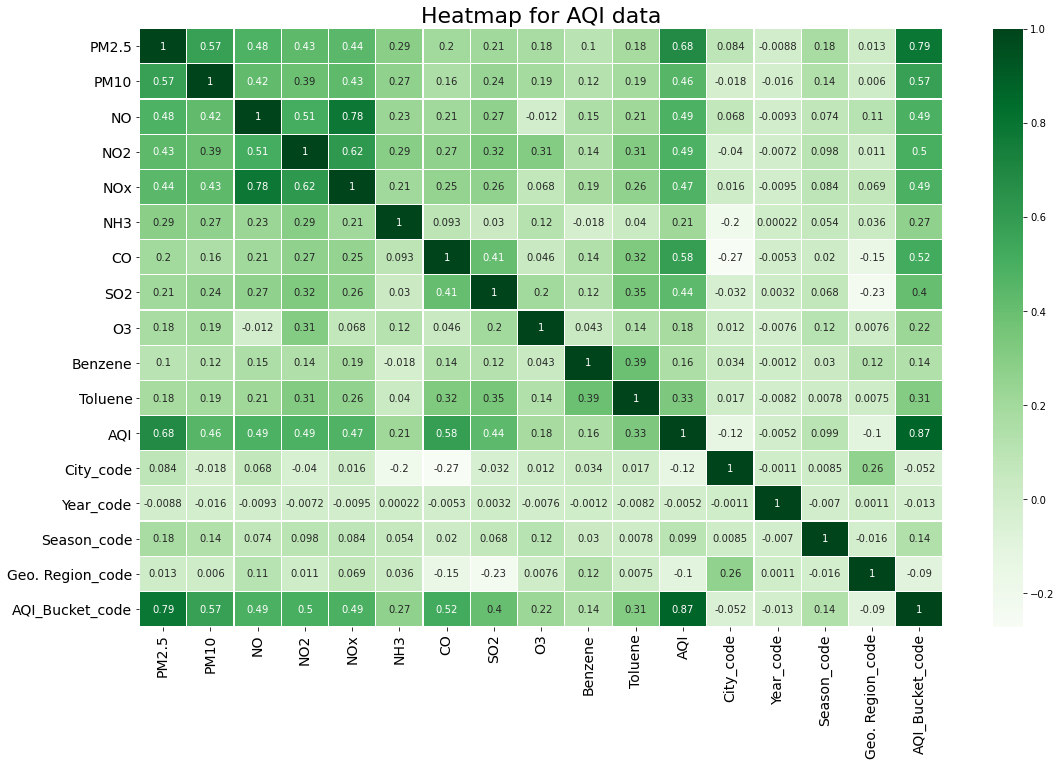

In [61]:
#plotting the heatmap for the correlation matrix
#heatmap is a visualization plot of the correlation matrix which displays correlation between all the features 

hm=plt.cm.Greens                                                     #command for color required; here 'Greens' hence the heatmap has green shade
plt.figure(figsize=(18,11))                                          #figure size
plt.title("Heatmap for AQI data",fontsize=22)                        #title of heatmap
plt.xticks(fontsize=14)                                              #fontsize for x-axis
plt.yticks(fontsize=14)                                              #fontsize for y-axis
sns.heatmap(df_aqi_code.corr(),cmap=hm,linewidths=0.2,annot=True)    #plotting heatmap with seaborn sns library; line width: thin line between each block

Conclusion:

From the above heatmap we can observe that no two features are very highly correlated.

1) Variable AQI and AQI_Bucket have correlation value of 0.87 because AQI is the numerical value calculated and AQI_Bucket is the category or class of that numerical value.
2) Among all the chemical constituents found in the air, we can observe that "PM2.5" has the highest correlation value with AQI and AQI_Bucket which implies that "PM2.5" is the highest contributor to bad air in the environment.

In [62]:
df_aqi_code.columns

Index(['PM2.5', 'PM10', 'NO', 'NO2', 'NOx', 'NH3', 'CO', 'SO2', 'O3',
       'Benzene', 'Toluene', 'AQI', 'City_code', 'Year_code', 'Season_code',
       'Geo. Region_code', 'AQI_Bucket_code'],
      dtype='object')

In [63]:
#storing feature variables in "X"

X=df_aqi_code.drop(["AQI","AQI_Bucket_code"],axis=1)
X

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,City_code,Year_code,Season_code,Geo. Region_code
0,192.35,269.55,61.52,36.390000,92.25,33.850000,8.24,9.25,41.68,14.360000,24.860000,10,0,3,4
1,186.18,269.55,61.52,32.870000,88.14,31.830000,8.24,6.65,29.97,10.550000,20.090000,10,1,3,4
2,87.18,131.90,25.73,30.310000,47.95,56.050000,8.24,2.66,19.71,3.910000,10.230000,10,2,3,4
3,151.84,241.84,25.01,36.910000,48.62,56.050000,8.24,4.63,25.36,4.260000,9.710000,10,3,3,4
4,146.60,219.13,14.01,34.920000,38.25,56.050000,8.24,3.33,23.20,2.800000,6.210000,10,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,35.42,57.82,44.50,31.150000,57.72,2.642771,0.82,3.99,25.76,1.730000,5.500000,21,0,1,0
24682,16.70,30.32,1.74,5.158607,3.81,2.660000,0.10,4.29,17.71,0.000000,0.020000,22,0,1,3
24683,24.85,31.06,27.73,29.360000,57.09,2.642771,1.52,14.42,14.90,0.000000,3.824813,23,0,1,0
24684,13.29,35.00,1.74,5.158607,3.81,5.620000,0.42,6.15,22.10,6.763205,8.229306,24,0,1,5


In [64]:
#storing target variable in 'y'

y=df_aqi_code["AQI"]
y

0        472.0
1        454.0
2        143.0
3        319.0
4        325.0
         ...  
24681     98.0
24682     24.0
24683    101.0
24684     41.0
24685     50.0
Name: AQI, Length: 24686, dtype: float64

In [65]:
#dividing the data into train test data where size of test data is 33% of the entire dataset

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.33,random_state=2)

In [66]:
#using chi2 function to find top 10 most important features in the dataset which contribute to the target variable

from sklearn.feature_selection import chi2  #importing chi2 library
fscores=chi2(X_train,y_train)               #using the function chi2 for training data and storing it in 'fscores'
fscores                                     #1st list is the f-values and 2nd list is for p-values

(array([456388.71126459, 288207.00200018,  79773.81325786,  72160.27552161,
         92763.50609232,  23797.34850811,  15888.84669233,  39522.63567976,
         23647.30678758,   7411.01602998,  32835.96626747,   6040.73329683,
          4287.46866678,    995.53615157,   2112.11740376]),
 array([0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 4.73019496e-010, 5.13164367e-133]))

In [67]:
#here we use f-value for our analysis, hence we store data from 1st list in 'fvalue'

fvalue=pd.Series(fscores[0])                #convering the list into series 
fvalue.index=X_train.columns                #Here we set index as the column header for better understanding of data
fvalue.sort_values(ascending=False)         #sorting the data in descending order, since a feature with higher f-value is of more importance

PM2.5               456388.711265
PM10                288207.002000
NOx                  92763.506092
NO                   79773.813258
NO2                  72160.275522
SO2                  39522.635680
Toluene              32835.966267
NH3                  23797.348508
O3                   23647.306788
CO                   15888.846692
Benzene               7411.016030
City_code             6040.733297
Year_code             4287.468667
Geo. Region_code      2112.117404
Season_code            995.536152
dtype: float64

Here we select only top 10 features with higher f-values to feed into our model and drop the features -"Benzene", "City_code", "Year_code", "Geo. Region_code", "Season_code"            

In [68]:
#dropping the insignificant columns from both train and test data 

X_train.drop(["Benzene", "City_code", "Year_code", "Geo. Region_code", "Season_code"],axis=1,inplace=True)
X_test.drop(["Benzene", "City_code", "Year_code", "Geo. Region_code", "Season_code"],axis=1,inplace=True)

C:\Users\Sarvesh\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [69]:
X_train

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene
5335,29.40,80.540000,5.47,12.86,3.81,6.751089,0.09,6.91,67.42,0.49
7651,66.89,138.436543,5.86,74.51,49.53,28.064311,5.86,45.02,68.56,32.37
3129,15.94,152.810141,7.62,11.71,19.33,34.264772,1.46,5.95,8.19,2.06
7749,84.40,200.500000,15.40,23.32,25.59,2.642771,1.49,8.21,41.55,4.40
1082,64.73,61.786003,17.01,14.82,31.83,37.067677,8.24,6.45,12.13,0.00
...,...,...,...,...,...,...,...,...,...,...
18898,192.35,269.550000,23.91,42.10,46.41,24.091538,1.44,11.12,27.04,5.97
11798,14.00,42.000000,14.33,19.84,29.19,12.980000,0.78,6.52,10.50,1.30
6637,128.71,188.057920,15.40,59.68,41.41,3.600000,0.89,7.14,39.88,2.77
2575,95.00,80.755887,9.63,74.51,4.22,8.355969,1.52,9.31,59.39,5.05


In [70]:
X_test

,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene
21675,57.17,177.990000,13.46,47.39,36.23,16.950000,1.18,31.84,61.89,0.000000
8842,50.15,112.360000,3.36,41.99,24.83,16.410000,0.83,7.47,49.61,6.170000
17513,34.90,72.300000,13.10,8.83,21.94,11.050000,0.24,9.00,28.31,1.020000
4896,63.70,181.890000,11.59,42.87,12.28,32.610000,0.21,25.87,52.81,2.590000
23297,20.76,45.580000,26.29,11.07,34.80,26.580000,0.58,5.68,37.83,2.231515
...,...,...,...,...,...,...,...,...,...,...
3018,60.92,74.510000,13.86,33.57,45.91,38.150000,1.08,7.74,42.22,8.870000
2867,59.30,178.627303,6.97,32.50,3.81,36.695328,1.12,6.50,28.43,0.900000
15673,69.30,135.220000,12.01,9.09,21.09,6.890000,0.80,26.79,19.53,2.250000
4378,68.90,105.730000,4.10,29.76,17.58,15.040000,1.27,5.03,74.12,7.010000


# applying MinMaxScaler to scale our data

In [71]:
#applying MinMaxScaler to our dataset
#MinMaxScaler transforms all the data in the range of [0,1]

from sklearn.preprocessing import MinMaxScaler     #importing MinMaxScaler
ms=MinMaxScaler()                                  #storing it in an object 'ms'
X_train=ms.fit_transform(X_train)                  #fitting and transforming the train data
X_test=ms.transform(X_test)                        #transforming the test data

In [72]:
print(X_train)
print("#########################################################")
print(X_test)

[[0.08996231 0.20978938 0.06237197 ... 0.10029499 0.89938387 0.01513747]
 [0.29931593 0.45164099 0.06889344 ... 0.99964602 0.91648927 1.        ]
 [0.01479827 0.51168391 0.09832365 ... 0.07764012 0.01065336 0.06363917]
 ...
 [0.64453441 0.65892468 0.22841854 ... 0.10572271 0.48615344 0.08557306]
 [0.45628926 0.21069121 0.13193428 ... 0.15693215 0.77889584 0.15600865]
 [0.24721485 0.43144021 0.05819155 ... 0.06867257 0.43903857 0.21872104]]
#########################################################
[[0.245037   0.6168679  0.19597843 ... 0.68861357 0.81640768 0.        ]
 [0.20583554 0.34271127 0.02708917 ... 0.11351032 0.63214952 0.19060859]
 [0.12067569 0.17536838 0.18995861 ... 0.14961652 0.31254865 0.03151066]
 ...
 [0.31277398 0.4382045  0.17173195 ... 0.56943953 0.18080707 0.0695088 ]
 [0.31054028 0.31501573 0.03946323 ... 0.0559292  0.9999156  0.21655854]
 [0.42747452 0.70346346 0.23360227 ... 0.47905605 0.78219688 0.67483265]]


# Applying LinearRegression

In [73]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()                                
lr.fit(X_train,y_train)                             # fitting 
y_pred_lr=lr.predict(X_test)                        # prediction
print(y_pred_lr)

[186.03144978 119.58848102  66.00568936 ... 157.27181481 157.58073546
 252.36012294]


In [74]:
from sklearn.metrics import mean_squared_error,r2_score
print("r2 score for linear regression=",round(r2_score(y_test,y_pred_lr),3))             # r square value
print("mean square error for linear regression=",mean_squared_error(y_test,y_pred_lr))   # mean square error

r2 score for linear regression= 0.703
mean square error for linear regression= 5868.6968357861715


# Applying Ordinary Least Squares (OLS) regression

In [75]:
import statsmodels.api as sm

ols=sm.OLS(y_train,X_train).fit()
y_pred_ols=ols.predict(X_test)
print(y_pred_ols)

[186.84940409 118.71685273  63.5907571  ... 155.06372397 157.9471092
 253.67810685]


In [76]:
print("R square value for OLS=",round(ols.rsquared,3))
print("Adjusted R square value for OLS=",round(ols.rsquared_adj,2))
print("Residual sum of square for OLS=",ols.ssr)
print("Mean square error for OLS",(ols.ssr/len(y)))             # mse=ssr/n  n: no. of observations

R square value for OLS= 0.88
Adjusted R square value for OLS= 0.88
Residual sum of square for OLS= 95046197.67006132
Mean square error for OLS 3850.2065004480805


# Applying Generalized Least Square (GLS) Regression

In [77]:
gls=sm.GLS(y_train,X_train).fit()
y_pred_gls=gls.predict(X_test)
print(y_pred_gls)
print("R square value for GLS=",round(gls.rsquared,2))
print("Adjusted R square value for GLS=",round(gls.rsquared_adj,2))
print("Residual Sum of squares for GLS=",gls.ssr)
print("Mean square error for GLS=",(gls.ssr/len(y)))

[186.84940409 118.71685273  63.5907571  ... 155.06372397 157.9471092
 253.67810685]
R square value for GLS= 0.88
Adjusted R square value for GLS= 0.88
Residual Sum of squares for GLS= 95046197.67006132
Mean square error for GLS= 3850.2065004480805


# Applying Support Vector Regression (SVR)

In [78]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
y_pred_svr=svr.predict(X_test)
print(y_pred_svr)

[159.11021888 114.24832403  68.86087757 ... 139.4675666  153.73702906
 212.3055056 ]


In [79]:
print("R square for SVR=",round(r2_score(y_test,y_pred_svr),2))
print("Mean square error for SVR=",mean_squared_error(y_test,y_pred_svr))

R square for SVR= 0.64
Mean square error for SVR= 7054.507101810385


# Applying RandomForestRegressor

In [80]:
from sklearn.ensemble import RandomForestRegressor
rfr=RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr=rfr.predict(X_test)
print(y_pred_rfr)

[151.1  116.88  74.74 ... 148.72 140.57 210.63]


In [81]:
print("R square value for RandomForestRegressor=",round(r2_score(y_test,y_pred_rfr),2))
print("Mean square error for RandomForestRegressor=",mean_squared_error(y_test,y_pred_rfr))

R square value for RandomForestRegressor= 0.88
Mean square error for RandomForestRegressor= 2400.74402407021


Thus here we can observe that:

1) Among all regressors OLS,GLS and RandomForestRegressor perform the best with r-square value of 0.88.
2) RandomForestRegressor has the lowest value for mean_square_error hence we'll select it for further analysis.

In [82]:
df_dep=pd.DataFrame(data=y_pred_rfr,columns=["AQI value"])       # storing the predicted values in dataframe df_dep

for i,data in df_dep.iterrows():
    if 0<=data["AQI value"]<=50:
        df_dep.at[i,"AQI category"]="Good"
    elif 51<=data["AQI value"]<=100:
        df_dep.at[i,"AQI category"]="Satisfactory"
    elif 101<=data["AQI value"]<=200:
        df_dep.at[i,"AQI category"]="Moderate"
    elif 201<=data["AQI value"]<=300:
        df_dep.at[i,"AQI category"]="Poor"
    elif 301<=data["AQI value"]<=400:
        df_dep.at[i,"AQI category"]="Very Poor"
    elif 401<=data["AQI value"]<=500:
        df_dep.at[i,"AQI category"]="Severe"
        
df_dep

,AQI value,AQI category
0,151.10,Moderate
1,116.88,Moderate
2,74.74,Satisfactory
3,159.21,Moderate
4,66.04,Satisfactory
...,...,...
8142,120.74,Moderate
8143,127.93,Moderate
8144,148.72,Moderate
8145,140.57,Moderate


In [83]:
# deployment libraries

from fastapi import FastAPI
from pydantic import BaseModel
import uvicorn
import pickle
import streamlit as st

In [84]:
app=FastAPI()    # creating an object of FASTAPI

In [85]:
class request_body(BaseModel):              # class created to store datatype of variables given by user
    PM25:float                              # specifying datatype
    PM10:float
    NO:float
    NO2:float
    NOx:float
    NH3:float
    CO:float
    SO2:float
    O3:float
    Toluene:float

In [86]:
# pickle library is used to dump(store) the learnt values

pickle.dump(rfr,open("model.pkl","wb"))       # dump the rfr model into variable model.pkl in "wb" (write binary) format so that it is unreadable

In [87]:
# loading the dumped model

loaded_model=pickle.load(open("model.pkl","rb"))

In [88]:
# creating user interface (UI)

def predict_input_page():
    st.title("Predicting Air Quality")           # title of the page
    
    PM25=st.text_input("PM2.5")                  # taking input from user through text input and storing them in variables
    PM10=st.text_input("PM10")
    NO=st.text_input("NO")
    NO2=st.text_input("NO2")
    NOx=st.text_input("NOx")
    NH3=st.text_input("NH3")
    CO=st.text_input("CO")
    SO2=st.text_input("SO2")
    O3=st.text_input("O3")
    Toluene=st.text_input("Toluene")
    
    ok=st.button("Predict AQI")                  # creating a button to predict
    
    try:                                         # checks if the suceeding condition holds true if not jumps to except
        if ok==True:                                 # if user presses the button
            test_data=np.array([[PM25,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Toluene]])
            class_idx=loaded_model.predict(test_data)[0]
            st.subheader(df_dep["AQI value"][class_idx])
            st.subheader(df_dep["AQI category"][class_idx])
    except:
        st.info("PLEASE ENTER APPROPRIATE DATA!!")

In [89]:
# creating gate point for the website

@app.post("/predict")

def predict(data:request_body):
    test_data=[[
        data.PM25,
        data.PM10,
        data.NO,
        data.NO2,
        data.NOx,
        data.NH3,
        data.CO,
        data.SO2,
        data.O3,
        data.Toluene
    ]]
    
    class_idx=loaded_model.predict(test_data)[0]   # predicting the class
    return {"classname":df_dep["AQI value"][class_idx]}    # returning AQI value
    return {"classname":df_dep["AQI category"][class_idx]} # returning AQI category

In [90]:
# input page

if __name__=="main":
    uvicorn.run(app,host="0.0.0.0",port=9000)